# A comprehensive tutorial

The mpoints package implements the class of state-dependent Hawkes processes. Its key features include both simulation and estimation (statistical inference). It also contains a module with specialised plot tools.

## State-dependent Hawkes processes

State-dependent Hawkes processes model the arrival in time of random events and their interaction with the state of a system.

A state-dependent Hawkes process consists of an increasing sequence of random times $(T_n)$, a sequence of random event types $(E_n)$ in $\mathcal{E}$ (the set of possible event types) and a piecewise constant càdlàg state process $(X(t))$ in $\mathcal{X}$ (the set of possible states). Here, we assume that the event space $\mathcal{E}$ and state space $\mathcal{X}$ are finite, with respective sizes $d_e$ and $d_x$.

### Dynamics of events

Denote by $N_e(t)$ the number of events of type $e\in\mathcal{E}$ that have occured up to time $t$ and by $(T^e_n)$ the arrival times of events of type $e$. The arrival rate of events of type $e$, denoted by $\lambda_e$ (its mathematical name is the intensity), is of the form

$$\lambda_e(t) = \nu_e + \sum_{e'\in\mathcal{E}}\int_{[0,t)}k_{e'e}(t-s, X(s))dN_{e'}(s)= \nu_e + \sum_{e'\in\mathcal{E}}\sum_{n : T^{e'}_n < t} k_{e'e}(t-T^{e'}_n, X(T^{e'}_n)).$$

The non-negative kernel $k_{e'e}$ determines how events of type $e'$ precipitate events of type $e$. Notice that it depends on the state process. The kernels allow to introduce self- and cross-excitations. When all the kernels are null, the events behave like in a standard Poisson process with non-negative arrival rates $(\nu_{e})_{e\in\mathcal{E}}$.

### Dynamics of the state process

The state process can only jump at the event times $(T_n)$. It jumps following transition probabilities that depend on both the current state and the event type. More precisely, denoting the history of $N:=(N_e)_{e\in\mathcal{E}}$ and $X$ at time $t$ by $\mathcal{F}^{N, X}_{t}$, it statisfies

$$ P(X_{T_n} = x \,\, | \,\,  E_n, \mathcal{F}^{N, X}_{T_n-}) = \phi_{E_n}(X_{T_n-},x),\quad x\in\mathcal{X},$$

where $\phi := (\phi_e)_{e\in\mathcal{E}}$ is a family of transition probability matrices.

Notice that the state process $(X(t))$ is fully determined by the its values $(X_n)$ at the event times $(T_n)$, that is, $X_n := X_{T_n}$.

Notice also that the counting process $N$ and the state process $X$ are fully coupled, in the sense that there is a two-way interaction: the self- and cross-excitations of $N$ depend on $X$ and the dynamics of $X$ depend on $N$.

### Exponential kernels

At the moment, the package implements only the case of exponential kernels, that is, we only consider parametric kernels of the form

$$ k_{e'e}(t,x) = \alpha_{e'xe}\exp(-\beta_{e'xe}t),\quad t>0, e',e\in\mathcal{E}, x\in\mathcal{X}, $$

where the base rates $\nu$ and impact coefficients $\alpha$ are non-negative and the decay coefficients $\beta$ are positive.

## Setting up the model

From the $\textit{mpoints}$ package, we import the class $\textit{HybridHawkesExp}$ the $\textit{plot_tools}$ module.

In [1]:
import os
os.chdir('/Users/maximemorariu/Dropbox/Documents/PyCharm/Packages/mpoints/')
import numpy as np
from mpoints.hybrid_hawkes_exp import HybridHawkesExp
from mpoints import plot_tools
import seaborn  # for good-looking plots
from IPython.display import set_matplotlib_formats  # set the figures format to svg
set_matplotlib_formats('svg')
%matplotlib inline

/Users/maximemorariu/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Set the meta-parameters

We set the dimension of the event space $\mathcal{E}$ and state space $\mathcal{X}$. We also name their elements.

In [2]:
n_events = 2  # number of event types, $d_e$
n_states = 2  # number of possible states, $d_x$
events_labels = ['A', 'B']  # names of the event types
states_labels = ['1', '2']  # names of the states

We initialise an instance of a state-dependent Hawkes process with exponential kernels.

In [3]:
model = HybridHawkesExp(n_events, n_states, events_labels, states_labels)

### Set the model parameters

We now need to input the parameters $\phi$, $\nu$, $\alpha$ and $\beta$.

In [4]:
# The transition probabilities $\phi$
phis = np.zeros((n_states, n_events, n_states))
phis[0, 0, 0] = 0.7
phis[0, 0, 1] = 0.3
phis[1, 0, 0] = 0.4
phis[1, 0, 1] = 0.6  # $\phi_0(1, 1)$, probability of transitioning from state 1 to 1 when an event of type 0 occurs
phis[0, 1, 0] = 0.3
phis[0, 1, 1] = 0.7
phis[1, 1, 0] = 0.6
phis[1, 1, 1] = 0.4

# The base rates $\nu$
nus = np.ones(n_events)

# The impact coefficients $\alpha$
alphas = np.zeros((n_events, n_states, n_events))
alphas[0, 0, 0] = 2
alphas[0, 0, 1] = 1
alphas[1, 0, 0] = 1
alphas[1, 0, 1] = 2
alphas[0, 1, 0] = 4
alphas[0, 1, 1] = 8
alphas[1, 1, 0] = 8
alphas[1, 1, 1] = 4

# The decay coefficients $\beta$
betas = np.zeros((n_events, n_states, n_events))
betas[0, 0, 0] = 4
betas[0, 0, 1] = 6
betas[1, 0, 0] = 6
betas[1, 0, 1] = 4
betas[0, 1, 0] = 12
betas[0, 1, 1] = 14
betas[1, 1, 0] = 14
betas[1, 1, 1] = 12

Set the transition probabilities $\phi$.

In [5]:
model.set_transition_probabilities(phis)

Set the parameters that govern the dynamics of the arrival rates, that is, $\nu$, $\alpha$ and $\beta$.

In [6]:
model.set_hawkes_parameters(nus, alphas, betas)

### Print the model parameters

The model paramaters can be conveniently converted to strings via the following methods.

In [7]:
# Sequence of transition probability matrices, one per event type
print(model.transition_matrix_to_string(phis))

[[ 0.7  0.3]
 [ 0.4  0.6]]
[[ 0.3  0.7]
 [ 0.6  0.4]]


In [8]:
# Sequence of impact coefficient matrices, one per possible state
print(model.impact_coefficients_to_string(alphas))

[[ 2.  1.]
 [ 1.  2.]]
[[ 4.  8.]
 [ 8.  4.]]


In [9]:
# Sequence of decay coefficient matrices, one per possible state
print(model.decay_coefficients_to_string(betas))

[[ 4.  6.]
 [ 6.  4.]]
[[ 12.  14.]
 [ 14.  12.]]


## Simulation

The model can now be simulated from time $t=0$ to time $t=7200$ (for two hours) as follows.

In [10]:
time_start = 0
time_end = 7200
times, events, states = model.simulate(time_start, time_end)

Let's see how many events have occured in two hours.

In [11]:
print('Number of events: ' + "{:,}".format(len(times)))

Number of events: 67,705


### Plot a sample path

The sample path from time $t_1$ to time $t_2$ can be plotted as follows. In the upper subplot, we show the state process $(X(t))$. The dots indicate the arrival times $(T_n)$ while their colour informs us on the event types $(E_n)$. The lower subplot displays the arrival rates $\lambda_e$ (intensities).

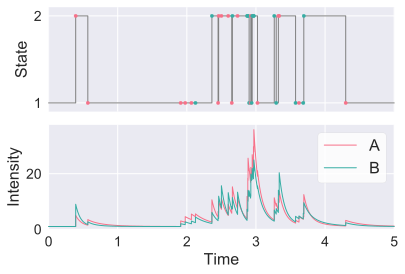

In [12]:
t_1 = 0
t_2 = 5
seaborn.set()
fig, fig_array = plot_tools.sample_path(times, events, states, model, t_1, t_2)

### Distribution of events and states

The joint distribution of $(E_n, X_n)$ can be computed and plotted as follows.

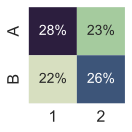

In [13]:
distribution = model.proportion_of_events_and_states(events, states, n_events, n_states)
fig = plot_tools.discrete_distribution(distribution, v_labels = events_labels, h_labels = states_labels,
                                       figsize=(2, 2))

## Statistical inference

Let's now imagine that `times`, `events` and `states` is some data that we want to analayse. We would like to fit a state-dependent Hawkes process to this sample path. Here, we should hopefully retrieve the original parameters `phis`, `nus`, `alphas` and `betas` that were used to generate this data.

Given this sample path, the model parameters can be estimated via maximum likelihood. It can be proven that the transition probabilities $\phi$ and the Hawkes parameters $\nu$, $\alpha$ and $\beta$ can be estimated independently, in spite of the strong coupling between $N$ and $X$.

### Estimate the transition probabilities

The transition probabilities $\phi$ are estimated as follows. Note that one can show that the maximum likelihood estimator is in fact given by the empirical transition probabilities.

In [14]:
phis_hat = model.estimate_transition_probabilities(events, states)

The transition probabilities can be plotted as a heatmap. The estimated transition probabilities coincide indeed with the true ones.

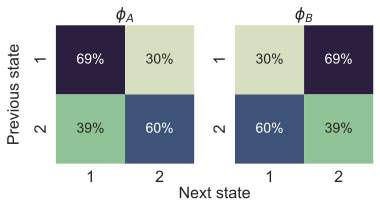

In [15]:
fig, fig_array = plot_tools.transition_probabilities(phis_hat, events_labels=events_labels, states_labels=states_labels,
                                                     figsize=(6, 3), left=0.12, right=0.88, bottom=0.18, top=0.82)

### Estimate the Hawkes parameters

The package comes with a built-in method that searches for the parameters $\nu$, $\alpha$ and $\beta$ that maximise the likelihood of events. More advanced users can apply their own optimisation algorithm by calling directly the methods that compute the log-likelihood or partial log-likelihoods (see the documentation).

In [16]:
opt_result, initial_guess, initial_guess_kind = model.estimate_hawkes_parameters(times, events, states,
                                                                                 time_start, time_end)

The method returns a $\textit{scipy.optimize.OptimizeResult}$ instance which contains the maximum likelihood estimate as a 1D numpy array. One can go from this 1D array to the usual parameter format as follows.

In [17]:
# the maximum likelihood estimate in a 1D array
mle_estimate = opt_result.x
# tranform it to the usual format
nus_hat, alphas_hat, betas_hat = model.array_to_parameters(mle_estimate, n_events, n_states)

We check that our estimate of the base rates $\nu$ is close to the original value `nus`.

In [18]:
print(nus)
print(nus_hat)

[ 1.  1.]
[ 0.99297878  1.026109  ]


The kernels can be visualised by plotting the functions

$$ t \mapsto ||k_{e'e}(\cdot,x)||_{1,t} := \int_0^t k_{e'e}(s,x)ds,\quad e',e\in\mathcal{E}, x\in\mathcal{X}, $$

which provide a convenient visualisation of the magnitude of the self- and cross-excitations and the effective timescales at which they occur. One can interpret $||k_{e'e}(\cdot,x)||_{1,t}$ as the average number of events of type $e$ that are directly precipitaed by an event of type $e'$ within $t$ seconds of its occurrence, under state $x$.
We plot these functions for the estimated and true kernels.

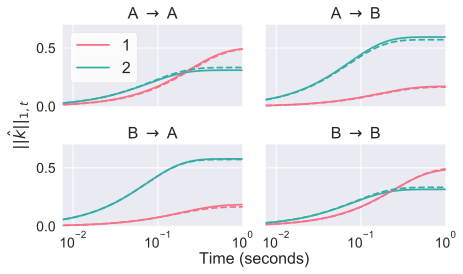

In [19]:
# Estimated kernels in full line
fig, fig_array = plot_tools.kernels_exp(alphas_hat, betas_hat, events_labels=events_labels, states_labels=states_labels,
                                        log_timescale=True, figsize=(7, 4))
# True kernels in dashed line
fig, fig_array = plot_tools.kernels_exp(alphas, betas,
                                        tmax=1, log_timescale=True, fig=fig, fig_array=fig_array, ls='--',
                                        left=0.12, right=0.88, bottom=0.15, top=0.85, ymax=0.7)
# Add x and y labels
txt = fig.text(0.5, 0.02, 'Time (seconds)', ha='center', fontsize=16)
txt = fig.text(0.01, 0.5, r'$||\hat{k}||_{1, t}$', va='center', rotation='vertical', fontsize=16)


For example, the top right subplot shows the kernels $k_{AB}(\cdot, x)$ for the two different states $x=1$ and $x=2$. We were indeed able to approximately retrieve the true paramaters from the sample path, thanks to the maximum likelihood princinple.

### Goodness-of-fit

Define the event residuals $r^e_n$ by

$$  r^e_n := \int_{t^e_{n-1}}^{t^e_n} \lambda_e (t)dt, \quad e\in\mathcal{E}, $$

where $t^e_n$ is the time when the $n$ th event of type $e$ occurred (that is, $t^e_n$ is the realisation of random variable $T^e_n$).

Let's compute the sequences of residuals (one per event type) under the estimated model. We first update the model paramaeters with the estimated ones.

In [20]:
model.set_transition_probabilities(phis_hat)
model.set_hawkes_parameters(nus_hat, alphas_hat, betas_hat)

The event residuals can then be computed as follows.

In [21]:
residuals = model.compute_events_residuals(times, events, states, time_start)

Under the assumption that the sample path was generated by this estimated model, the event residuals $(r^e_n)_{n\in\mathbb{N}, e\in\mathcal{E}}$ are the realisation of i.i.d standard unit rate exponential random variables. Hence, the goodness-of-fit of our estimated model can be assessed by analysing the distribution of the event residuals.

For comparison, we also compute the event residuals under a naive Poisson model.

In [22]:
n_states_poisson = 1  # no state process under this naive model
model_poisson = HybridHawkesExp(n_events, n_states_poisson, events_labels, ['no state'])
# the transition probabilities are then trivial
model_poisson.set_transition_probabilities(np.ones((n_states_poisson, n_events, n_states_poisson)))
# compute the mean arrival rate and use it as the base rate
nus_poisson = np.zeros(n_events)
for e in range(n_events):
    nus_poisson[e] = (events == e).sum() / (time_end - time_start)
# impact coefficients set to null to get a Poisson process
alphas_poisson = np.zeros((n_events, n_states_poisson, n_events))
# deceay coefficents, their value does not matter here
betas_poisson = np.ones((n_events, n_states_poisson, n_events))
# set the parameters that govern the arrival rates of events (intensities)
model_poisson.set_hawkes_parameters(nus_poisson, alphas_poisson, betas_poisson)
# compute the event residuals under this naive model
states_poisson = np.zeros(len(times), dtype='int')  # we create a fake trivial state process
residuals_poisson = model_poisson.compute_events_residuals(times, events, states_poisson, time_start)

For every event type $e\in\mathcal{E}$, we compare the distribution of $(r^e_n)$ to the standard exponential distirbution via a qq-plot. We do this under both the state-dependent-Hawkes-proces model and the Poisson model.

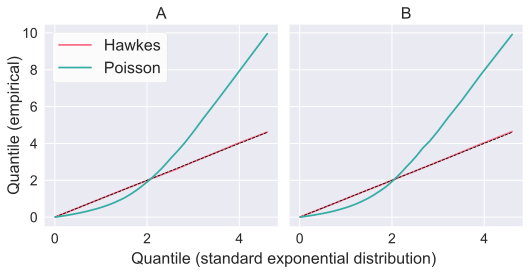

In [23]:
model_labels = ['Hawkes', 'Poisson']
fig, fig_array = plot_tools.qq_plot([residuals, residuals_poisson], shape=(1, n_events), labels=events_labels,
                                    model_labels=model_labels,
                                    figsize=(8, 4), left=0.085, right=0.915, bottom=0.15, top=0.85)

We also plot the correlogram of the event residuals time series $(r_n) := (r^1_n, \ldots, r^{d_e}_n)$ as a test of the mutual independence.

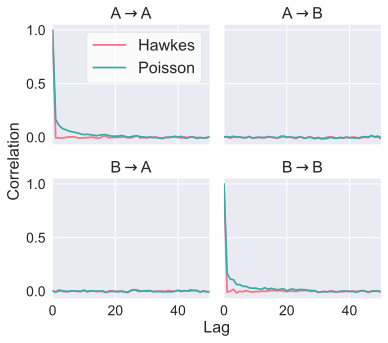

In [24]:
fig, fig_array = plot_tools.correlogram([residuals, residuals_poisson], labels=events_labels,
                                        model_labels=model_labels,
                                        figsize=(6, 5), left=0.12, right=0.88, bottom=0.12, top=0.88)

As expected, the state-dependent Hawkes process provides an (almost) perfect fit but the Poisson model does not.

A similar study can be performed with the total residuals $r^{ex}_n$, defined by

$$ r^{ex}_n := \int_{t^{ex}_{n-1}}^{t^{ex}_n}\phi_{e}(X(t),x) \lambda_e (t)dt, $$

where $t^{ex}_n$ is the time when the $n$ th event of type $e$ after which the state is $x$ occurred.

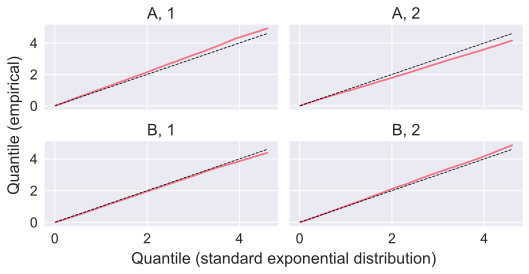

In [25]:
residuals_total = model.compute_total_residuals(times, events, states, time_start)
product_labels = model.generate_product_labels()
fig, fig_array = plot_tools.qq_plot(residuals_total, shape=(n_events, n_states), labels=product_labels,
                                    figsize=(8, 4), left=0.085, right=0.915, bottom=0.15, top=0.85)